# Neural Network
We will be implementing a 2 layer neural network in Numpy

In [15]:
import numpy as np
import time
import matplotlib.pyplot as plt

# Parameters

In [16]:
#two layer neural network
n_hidden=10
n_input=10
n_out=10
#sample data
n_sample=300
#hyperparameters
learning_rate=0.01
momentum=0.9
#non deterministic seeding
np.random.seed(0)

# Activation Functions

In [17]:
#activation function
def sigmoid(x):
    return 1.0/(1+np.exp(-x))

def tanh_prime(x):
    return 1-np.tanh(x)**2

# Writing Our very own Neural Network
Update Rules
![](./images/backprop.svg)

In [8]:
def train(x,t,v,w,bv,bw):
    #x=input data
    #t=output
    #v,w= weights of the two layers
    #bv and bw bias
    
    #forward pass- matrix mul+bias followed by a non linearity
    zj=np.dot(x,v)+bv
    oj=np.tanh(zj)
    
    zk=np.dot(oj,w)+bw
    ok=sigmoid(zk)
    
    #backprop
    Ew=ok-t
    Ev=tanh_prime(zj)*np.dot(w,Ew)
    
    #predict loss
    #out[i, j] = a[i] * b[j]
    dW=np.outer(oj,Ew)
    dV=np.outer(x,Ev)
    
    #cross entropy loss
    loss=-np.mean( t* np.log(ok)+(1-t)*np.log(1-ok))
    
    #returning loss and deltas 
    return loss,(dV,dW,Ev,Ew)

# Prediction step

In [9]:
def predict(x,v,w,bv,bw):
    A=np.dot(x,v)+bv
    z=np.tanh(A)
    
    B=np.dot(z,w)+bw
    return (sigmoid(B)>0.5).astype(int)

# Creating Layers

In [18]:
#creating layers
v=np.random.normal(scale=0.1,size=(n_input,n_hidden))
w=np.random.normal(scale=0.1,size=(n_hidden,n_out))

bv=np.zeros(n_hidden)
bw=np.zeros(n_out)

#array of values
params=[v,w,bv,bw]

#generating data
x=np.random.binomial(1,0.5,(n_sample,n_input))
t=x^1

# Training Step

In [19]:
totalloss=[]
for epoch in range(100):
    err=[]
    upd=[0]*len(params)
    t0=time.clock()
    #for each datapoint update weights
    for i in range(x.shape[0]):
        loss,grad=train(x[i],t[i],*params)
        #update loss
        for a in range(len(params)):
            params[a]-=upd[a]
        for b in range(len(params)):
            upd[b]=learning_rate*grad[b]+momentum*upd[b]
            
        err.append(loss)
        #print(loss)
    totalloss.append(np.mean(err))    
    print('Epoch: %d, Loss:%.8f, Time: %.4f s' %(
        epoch,np.mean(err),time.clock()-t0))

Epoch: 0, Loss:0.45465070, Time: 0.0310 s
Epoch: 1, Loss:0.13697961, Time: 0.0239 s
Epoch: 2, Loss:0.06206941, Time: 0.0215 s
Epoch: 3, Loss:0.04092746, Time: 0.0201 s
Epoch: 4, Loss:0.03159958, Time: 0.0302 s
Epoch: 5, Loss:0.02592744, Time: 0.0246 s
Epoch: 6, Loss:0.02199575, Time: 0.0180 s
Epoch: 7, Loss:0.01907812, Time: 0.0166 s
Epoch: 8, Loss:0.01682099, Time: 0.0284 s
Epoch: 9, Loss:0.01502363, Time: 0.0180 s
Epoch: 10, Loss:0.01356039, Time: 0.0286 s
Epoch: 11, Loss:0.01234775, Time: 0.0197 s
Epoch: 12, Loss:0.01132776, Time: 0.0222 s
Epoch: 13, Loss:0.01045887, Time: 0.0190 s
Epoch: 14, Loss:0.00971052, Time: 0.0204 s
Epoch: 15, Loss:0.00905971, Time: 0.0196 s
Epoch: 16, Loss:0.00848887, Time: 0.0201 s
Epoch: 17, Loss:0.00798436, Time: 0.0191 s
Epoch: 18, Loss:0.00753542, Time: 0.0187 s
Epoch: 19, Loss:0.00713347, Time: 0.0182 s
Epoch: 20, Loss:0.00677160, Time: 0.0185 s
Epoch: 21, Loss:0.00644415, Time: 0.0265 s
Epoch: 22, Loss:0.00614650, Time: 0.0287 s
Epoch: 23, Loss:0.005

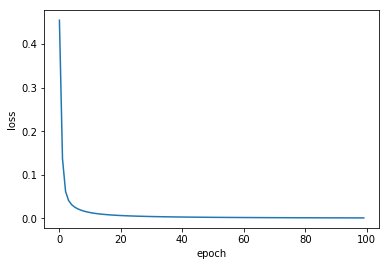

In [20]:
plt.plot(totalloss)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

# Predicting

In [21]:
x=np.random.binomial(1,0.5,n_input)
print('Input data');
print(x)
print('Output should be')
print(x^1)
print('Output is')
print(predict(x,*params))

Input data
[1 0 1 1 1 1 0 1 0 0]
Output should be
[0 1 0 0 0 0 1 0 1 1]
Output is
[0 1 0 0 0 0 1 0 1 1]
